In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [81]:
df= pd.read_csv("h1n1_vaccine_prediction.csv")

In [82]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [83]:
df.shape


(26707, 34)

#there are total 26707 observations and 34 columns

In [84]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [85]:
df.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [86]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

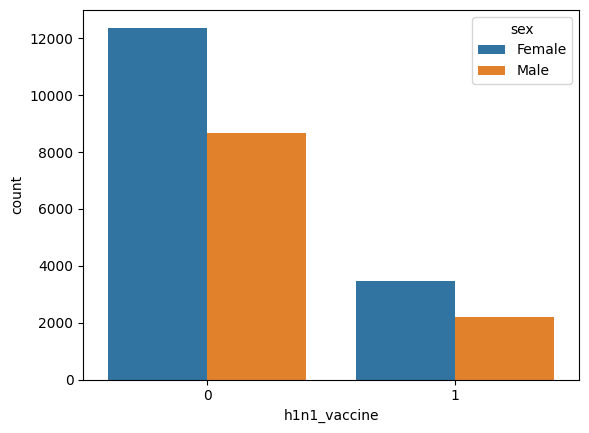

In [87]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)
plt.show()
# Here more than 12000 male and more than 8000 female are not vaccinated.
# And nearby 4000 male and nearby 2000 female are vaccinated.

# Here more than 8000 male and more than 12000 female are not vaccinated.
# And nearby 2000 male and nearby 4000 female are vaccinated.

In [88]:
#sns.pairplot(df)
#plt.show()

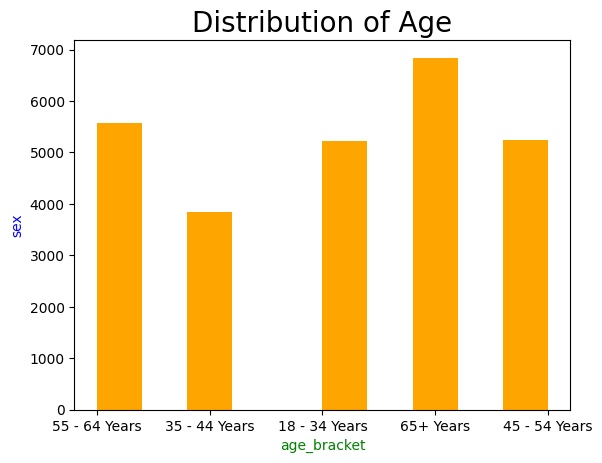

In [89]:
# data visualization
# histogram (numerical)
plt.hist(x=df["age_bracket"],color="orange")
plt.title("Distribution of Age",fontsize=20,color="black")
plt.xlabel("age_bracket",fontsize=10,color="green")
plt.ylabel("sex",fontsize=10,color="blue")
plt.show()

AGE IS NOT NORMALLY DISTRIBUTED



In [90]:
df["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Here 21033 peoples are "not vaccinated" and 5674 peoples are "vaccinated"

In [91]:
df = df.drop(["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"],axis=1)

In [92]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
no_of_adults                   249
no_of_children                 249
h1n1_vaccine                     0
dtype: int64

In [93]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

Now we are going to find replace values and removing it ....

In [94]:
df = df.drop(["has_health_insur"],axis=1)

In [95]:
df.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [96]:
median1 = df["dr_recc_h1n1_vacc"].median()
median1

0.0

In [97]:
df["dr_recc_h1n1_vacc"] = df["dr_recc_h1n1_vacc"].replace(np.nan,median1)

In [98]:
df.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [99]:
median2 = df["chronic_medic_condition"].median()
median2

0.0

In [100]:
df["chronic_medic_condition"] = df["chronic_medic_condition"].replace(np.nan,median2)

In [101]:
mean1=df["cont_child_undr_6_mnths"].mean()
mean1

0.0825897168462935

In [102]:
df["cont_child_undr_6_mnths"] = df["cont_child_undr_6_mnths"].replace(np.nan,mean1)

In [103]:
mean2=df["is_health_worker"].mean()
mean2

0.111917538509053

In [104]:
df["is_health_worker"] = df["is_health_worker"].replace(np.nan,mean2)

In [105]:
median3=df["sick_from_seas_vacc"].median()
median3

2.0

In [106]:
df["sick_from_seas_vacc"] = df["sick_from_seas_vacc"].replace(np.nan,median3)

In [107]:
median4=df["is_seas_risky"].median()
median4

2.0

In [108]:
df["is_seas_risky"] = df["is_seas_risky"].replace(np.nan,median4)

In [109]:
median5=df["is_seas_vacc_effective"].median()
median5

4.0

In [110]:
df["is_seas_vacc_effective"] = df["is_seas_vacc_effective"].replace(np.nan,median5)

In [111]:
mean3=df["is_h1n1_vacc_effective"].mean()
mean3

3.85062319501444

In [112]:
df["is_h1n1_vacc_effective"] = df["is_h1n1_vacc_effective"].replace(np.nan,mean3)

In [113]:
mean4=df["sick_from_h1n1_vacc"].mean()
mean4

2.357669504408635

In [114]:
df["sick_from_h1n1_vacc"] = df["sick_from_h1n1_vacc"].replace(np.nan,mean4)

In [115]:
mean5=df["is_h1n1_risky"].mean()
mean5

2.3425662069227555

In [116]:
df["is_h1n1_risky"] = df["is_h1n1_risky"].replace(np.nan,mean5)

In [117]:
mode1=df["no_of_children"].mode().values[0]
mode1

0.0

In [118]:
df["no_of_children"] = df["no_of_children"].replace(np.nan,mode1)

In [119]:
mode2=df["no_of_adults"].mode().values[0]
mode2

1.0

In [120]:
df["no_of_adults"] = df["no_of_adults"].replace(np.nan,mode2)

In [121]:
mode3=df["contact_avoidance"].mode().values[0]
mode3

1.0

In [122]:
df["contact_avoidance"] = df["contact_avoidance"].replace(np.nan,mode3)

In [123]:
mode4=df["avoid_touch_face"].mode().values[0]
mode4

1.0

In [124]:
df["avoid_touch_face"] = df["avoid_touch_face"].replace(np.nan,mode4)

In [125]:
mode5=df["h1n1_awareness"].mode().values[0]
mode5

1.0

In [126]:
df["h1n1_awareness"] = df["h1n1_awareness"].replace(np.nan,mode5)

In [127]:
mode6=df["h1n1_worry"].mode().values[0]
mode6

2.0

In [128]:
df["h1n1_worry"] = df["h1n1_worry"].replace(np.nan,mode6)

In [129]:
median6=df["avoid_large_gatherings"].median()
median6

0.0

In [130]:
df["avoid_large_gatherings"] = df["avoid_large_gatherings"].replace(np.nan,median6)

In [131]:
mean6=df["reduced_outside_home_cont"].mean()
mean6

0.33731455399061033

In [132]:
df["reduced_outside_home_cont"] = df["reduced_outside_home_cont"].replace(np.nan,mean6)

In [133]:
mean7=df["antiviral_medication"].mean()
mean7

0.048843670220753865

In [134]:
df["antiviral_medication"] = df["antiviral_medication"].replace(np.nan,mean7)


In [135]:
mean8=df["wash_hands_frequently"].mean()
mean8

0.825614100881305

In [136]:
df["wash_hands_frequently"] = df["wash_hands_frequently"].replace(np.nan,mean8)

In [137]:
mean9=df["bought_face_mask"].mean()
mean9

0.06898231414868106

In [138]:
df["bought_face_mask"] = df["bought_face_mask"].replace(np.nan,mean9)

In [139]:
mean10=df["dr_recc_seasonal_vacc"].mean()
mean10

0.32973479447590337

In [140]:
df["dr_recc_seasonal_vacc"] = df["dr_recc_seasonal_vacc"].replace(np.nan,mean10)

In [141]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

Hence,we removing the all missing Values in the dataset!!!!!!!!!!!!!!


Creating the Model...

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [143]:
# Split into X and Y
X = df.drop("h1n1_vaccine",axis = 1)
Y = df["h1n1_vaccine"]

In [144]:
# Training and Testing Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [145]:
model1 = LogisticRegression()

In [146]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [147]:
model1.score(X_train,Y_train)

0.7893441746014764

In [148]:
model1.score(X_test,Y_test)

0.792087857231998

DecisionTreeClassifier

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
model_2 = DecisionTreeClassifier(max_depth = 4)
model_2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [151]:
model_2.score(X_train,Y_train)

0.828447630255697

In [152]:
model_2.score(X_test,Y_test)

0.83651566204917

In [153]:
from sklearn.metrics import confusion_matrix

In [154]:
predictions = model1.predict(X_test)

In [155]:
accuracy_score(Y_test,predictions)

0.792087857231998

In [156]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      6330
           1       0.51      0.18      0.27      1683

    accuracy                           0.79      8013
   macro avg       0.66      0.57      0.57      8013
weighted avg       0.75      0.79      0.75      8013



In [182]:
from sklearn.metrics import confusion_matrix

In [184]:
sanket = metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_sanket = pd.DataFrame(cm,index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (9,7))
plt.title("Confusion_Matrix",fontsize=20,color="black")
sns.heatmap(df_cm,annot=True,fmt='g')

NameError: ignored

BaggingClassifier...

In [158]:
from sklearn.ensemble import BaggingClassifier

In [159]:
model_3 = BaggingClassifier(n_estimators=10,estimator = model_2)
model_3.fit(X_train,Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4))

In [161]:
model_3.score(X_train,Y_train)

0.8297314646410613

In [162]:
model_3.score(X_test,Y_test)

0.840134780980906

AdaBoostClassifier....

In [163]:
from sklearn.ensemble import AdaBoostClassifier

In [164]:
model_4 = AdaBoostClassifier(n_estimators = 5)
model_4.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=5)

In [167]:
model_4.score(X_train,Y_train)

0.8268963303733818

In [166]:
model_4.score(X_test,Y_test)

0.8361412704355422

GradientBoostingClassifier...

In [168]:
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
model_5 = GradientBoostingClassifier(n_estimators = 10)
model_5.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=10)

In [170]:
model_5.score(X_train,Y_train)

0.8137370279233979

In [171]:
model_5.score(X_test,Y_test)

0.8192936478222888

RandomForestClassifier...

In [172]:
from sklearn.ensemble import RandomForestClassifier


In [173]:
model_6 = RandomForestClassifier(n_estimators = 30,max_features = 15)
model_6.fit(X_train,Y_train)

RandomForestClassifier(max_features=15, n_estimators=30)

In [174]:
model_6.score(X_train,Y_train)

0.9972183588317107

In [175]:
model_6.score(X_test,Y_test)

0.8294022213902409

SVM...

In [176]:
from sklearn.svm import SVC

In [177]:
model_7=SVC()

In [179]:
model_7.score(X_train,Y_train)

NotFittedError: ignored

In [180]:
model_7.score(X_test,Y_test)

NotFittedError: ignored